In [1]:
import pandas as pd

In [19]:
file_location = 'https://raw.githubusercontent.com/silviozjr/AnaliseDadosMuseus/main/museums.csv'
df = pd.read_csv(file_location)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,14,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),Street Address (Physical Location),City (Physical Location),State (Physical Location),Zip Code (Physical Location),Phone Number,Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue
0,8400200098,ALASKA AVIATION HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,4721 AIRCRAFT DR,ANCHORAGE,AK,99502,NaN,NaN,NaN,NaN,9072485325,61.17925,-149.97254,1.0,20.0,2.0,6,920071852,201312.0,602912.0,550236.0
1,8400200117,ALASKA BOTANICAL GARDEN,ALASKA BOTANICAL GARDEN INC,NaN,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",NaN,4601 CAMPBELL AIRSTRIP RD,ANCHORAGE,AK,99507,NaN,NaN,NaN,NaN,9077703692,61.16890,-149.76708,4.0,20.0,2.0,6,920115504,201312.0,1379576.0,1323742.0
2,8400200153,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,NaN,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,NaN,9711 KENAI SPUR HWY,KENAI,AK,99611,NaN,NaN,NaN,NaN,9072832000,60.56149,-151.21598,3.0,122.0,2.0,6,921761906,201312.0,740030.0,729080.0
3,8400200143,ALASKA EDUCATORS HISTORICAL SOCIETY,ALASKA EDUCATORS HISTORICAL SOCIETY,NaN,HISTORIC PRESERVATION,NaN,214 BIRCH STREET,KENAI,AK,99611,NaN,NaN,NaN,NaN,2142472478,60.56280,-151.26597,3.0,122.0,2.0,6,920165178,201412.0,0.0,0.0
4,8400200027,ALASKA HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,301 W NORTHERN LIGHTS BLVD,ANCHORAGE,AK,99503,NaN,NaN,NaN,NaN,9072652834,61.17925,-149.97254,1.0,20.0,2.0,6,920071852,201312.0,602912.0,550236.0


In [10]:
#Verificando quantidade de linhas e colunas do dataset
df.shape

(33072, 25)

In [20]:
#Extraindo apenas as colunas que serão utilizadas
df = df[ ['Museum Name',
          'Museum Type',
          'City (Administrative Location)',
          'State (Administrative Location)',
          'City (Physical Location)',
          'State (Physical Location)',
          'Revenue'] ]
df.head()

,Museum Name,Museum Type,City (Administrative Location),State (Administrative Location),City (Physical Location),State (Physical Location),Revenue
0,ALASKA AVIATION HERITAGE MUSEUM,HISTORY MUSEUM,ANCHORAGE,AK,NaN,NaN,550236.0
1,ALASKA BOTANICAL GARDEN,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",ANCHORAGE,AK,NaN,NaN,1323742.0
2,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,KENAI,AK,NaN,NaN,729080.0
3,ALASKA EDUCATORS HISTORICAL SOCIETY,HISTORIC PRESERVATION,KENAI,AK,NaN,NaN,0.0
4,ALASKA HERITAGE MUSEUM,HISTORY MUSEUM,ANCHORAGE,AK,NaN,NaN,550236.0


In [21]:
#Verificando o tipo dos dados
df.dtypes

Museum Name                         object
Museum Type                         object
City (Administrative Location)      object
State (Administrative Location)     object
City (Physical Location)            object
State (Physical Location)           object
Revenue                            float64
dtype: object

In [22]:
#Qual foi a receita total?
df['Revenue'].sum()

467556088899.0

In [23]:
df.isna().sum()

Museum Name                            0
Museum Type                            0
City (Administrative Location)         0
State (Administrative Location)        0
City (Physical Location)           23849
State (Physical Location)          23849
Revenue                            10782
dtype: int64

In [24]:
#Criando novas colunas para armazenar a cidade e o estado
df['City'] = df['City (Physical Location)']
df['State'] = df['State (Physical Location)']

In [25]:
#Nos museus onde não está informada a localização física, considerar a localização administrativa
df['City'].fillna(df['City (Administrative Location)'], inplace=True)
df['State'].fillna(df['State (Administrative Location)'], inplace=True)

In [26]:
df.isna().sum()

Museum Name                            0
Museum Type                            0
City (Administrative Location)         0
State (Administrative Location)        0
City (Physical Location)           23849
State (Physical Location)          23849
Revenue                            10782
City                                   0
State                                  0
dtype: int64

In [30]:
#Removendo as colunas antigas de localização
df.drop(['City (Administrative Location)',
         'State (Administrative Location)',
         'City (Physical Location)',
         'State (Physical Location)'], axis=1, inplace=True)
df.head(1)

,Museum Name,Museum Type,Revenue,City,State
0,ALASKA AVIATION HERITAGE MUSEUM,HISTORY MUSEUM,550236.0,ANCHORAGE,AK


In [36]:
#Quantos museus/parques existem por estado?
df['State'].value_counts()

CA    2676
NY    2246
TX    1888
PA    1663
OH    1368
IL    1308
FL    1152
MI    1040
MA    1031
VA     956
WI     886
NC     782
NJ     757
MO     739
WA     725
IN     689
MN     681
GA     665
IA     661
CO     648
MD     620
TN     560
OR     551
CT     543
KS     538
ME     522
OK     487
KY     468
AL     462
AZ     451
LA     396
SC     389
NH     364
NE     348
NM     321
AR     318
VT     292
MT     270
ND     268
WV     259
MS     250
SD     234
ID     215
DC     197
WY     192
RI     183
HI     176
NV     172
UT     170
AK     162
DE     133
Name: State, dtype: int64

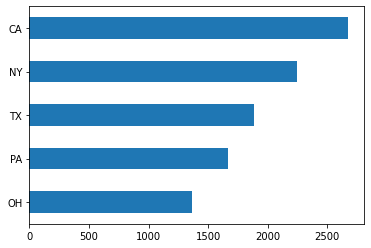

In [43]:
#Gráfico com os 5 estados que possuem mais museus/parques
grafico = df['State'].value_counts().nlargest(5).plot.barh();
grafico.invert_yaxis()

In [57]:
#Quais as 10 cidades com mais museus/parques?
df.groupby('City')['State'].value_counts().nlargest(10)

City           State
NEW YORK       NY       304
CHICAGO        IL       194
WASHINGTON     DC       194
PHILADELPHIA   PA       183
LOS ANGELES    CA       165
HOUSTON        TX       130
BALTIMORE      MD       121
SAN FRANCISCO  CA       119
SEATTLE        WA       105
AUSTIN         TX        98
Name: State, dtype: int64

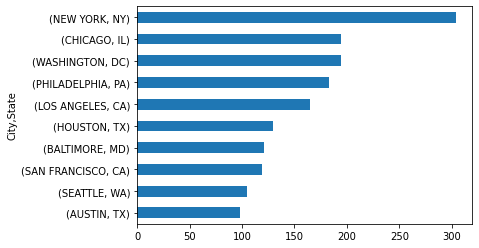

In [58]:
#Gráfico com as 10 cidades que possuem mais museus/parques
grafico = df.groupby('City')['State'].value_counts().nlargest(10).plot.barh();
grafico.invert_yaxis()

In [64]:
#Qual a receita média?
#Primeiro eliminar os valores nulos
df['Revenue'].fillna(0, inplace=True)

In [66]:
#Verificar que não existem mais valores nulos na coluna Revenue
df.isna().sum()

Museum Name    0
Museum Type    0
Revenue        0
City           0
State          0
dtype: int64

In [70]:
#Alterar formatação dos valores
pd.options.display.float_format = '${:,.2f}'.format

In [73]:
#Considerar a média apenas dos registros que possuem o valor informado, ignorando os valores zerados
df.query('Revenue > 0')['Revenue'].mean()

40774784.572076395

In [76]:
#Quais os tipos de museus/parques?
df['Museum Type'].value_counts()

HISTORIC PRESERVATION                            14861
GENERAL MUSEUM                                    8699
ART MUSEUM                                        3241
HISTORY MUSEUM                                    2284
ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER     1484
SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM        1081
ZOO, AQUARIUM, OR WILDLIFE CONSERVATION            564
CHILDREN'S MUSEUM                                  512
NATURAL HISTORY MUSEUM                             346
Name: Museum Type, dtype: int64

In [79]:
#Qual a média de receita por estado?
df.query('Revenue > 0').groupby('State')['Revenue'].mean()

State
AK     $1,612,239.32
AL     $4,130,390.61
AR     $8,376,558.14
AZ    $47,482,627.24
CA    $48,309,819.67
CO    $18,682,406.11
CT   $125,429,565.57
DC   $271,077,502.03
DE    $77,477,394.12
FL    $21,703,904.36
GA    $67,755,640.46
HI     $5,363,686.94
IA    $14,630,537.01
ID     $9,019,664.78
IL    $51,582,422.15
IN    $18,627,442.19
KS     $1,942,054.58
KY    $15,298,490.16
LA    $35,971,632.22
MA   $252,666,915.30
MD   $105,213,943.45
ME    $11,223,668.91
MI     $4,997,538.91
MN    $13,580,538.61
MO    $30,901,922.83
MS     $5,857,039.80
MT     $1,742,701.46
NC    $15,547,642.44
ND       $252,450.89
NE    $11,570,798.65
NH    $28,918,647.13
NJ    $13,350,463.77
NM     $1,368,558.67
NV     $1,713,660.12
NY    $45,570,295.06
OH     $9,752,124.05
OK     $4,821,915.53
OR     $6,573,205.45
PA    $35,260,822.73
RI    $63,077,807.02
SC    $11,804,028.91
SD     $8,056,685.79
TN    $72,872,073.87
TX    $22,057,155.01
UT     $4,458,398.91
VA    $10,202,298.25
VT    $10,316,670.91
WA     